<a href="https://colab.research.google.com/github/raj-vijay/mv/blob/master/01_Lab_I_Machine_Vision_Capture_Video%2C_Extract_Frame_and_Display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Capturing and displaying images with OpenCV**

The lab looks at basic OpenCV functions for capturing, recording, loading and saving images and videos. 

The goal of this lab is to setup a development environment and implement some basic functions to make sure that the environment is setup correctly.

Import Open CV

In [0]:
import cv2

**Function to Capture Image Sequence**

Create a Python program that captures an image sequence from your web camera and saves it as a video to a file using OpenCV. 

Also display the video on screen while you are recording it.

In [0]:
def capture_image_sequence():        
    cv2.namedWindow("camera")
    camera = cv2.VideoCapture(0)
    
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480))
    
    recording = False
    counter = 0
    while camera.isOpened():
        ret,img= camera.read()        
 
        if recording:
            out.write(img)
            cv2.putText(img,'recording', (10,60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255))
        
        cv2.putText(img,str(counter), (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255))
        cv2.imshow("camera", img)    
        
        counter += 1
        
        k = cv2.waitKey(1)
        if k%256 == 32:
            if not recording:
                counter = 0
                print("Space hit, recording...")
                recording = True
            else:
                print("Space hit, stop recording and closing...")
                break
        elif k%256 == 27:
            print("Escape hit, closing...")
            break    
        
    out.release()
    camera.release()
    cv2.destroyWindow("camera") 

**Function to Extract Frames**

Create a Python program that loads the video file created in task 1, extracts the 10th frame from this file and saves this frame into an image file using OpenCV.

In [0]:
def extract_frames(numbers):
    video = cv2.VideoCapture("output.mp4")
    counter = 0
    while video.isOpened():
        ret,img= video.read()
        if not ret:
            break
        if counter in numbers:
            cv2.imwrite("frame_%s.jpg"%counter, img)
        counter+=1
    # video.release()
    # cv2.destroyWindow("video")

**Function to Load and Display**

Create a Python program that loads the image file created in task 2 and displays it on the screen using OpenCV.

In [0]:
from google.colab.patches import cv2_imshow
def load_and_display(number):
    img = cv2.imread("frame_%s.jpg"%number)
    # cv2.imshow("image", img)
    cv2_imshow(img)
    # cv2.waitKey(0)
    # cv2.destroyWindow("image")

Defining the function to do the following:
    a) Capture Image Sequences
    b) Extract Frames
    c) Load & Display Captured Frames

In [0]:
def main():
    # capture_image_sequence()
    
    extract_frames([25,50,100])
    
    load_and_display(50)

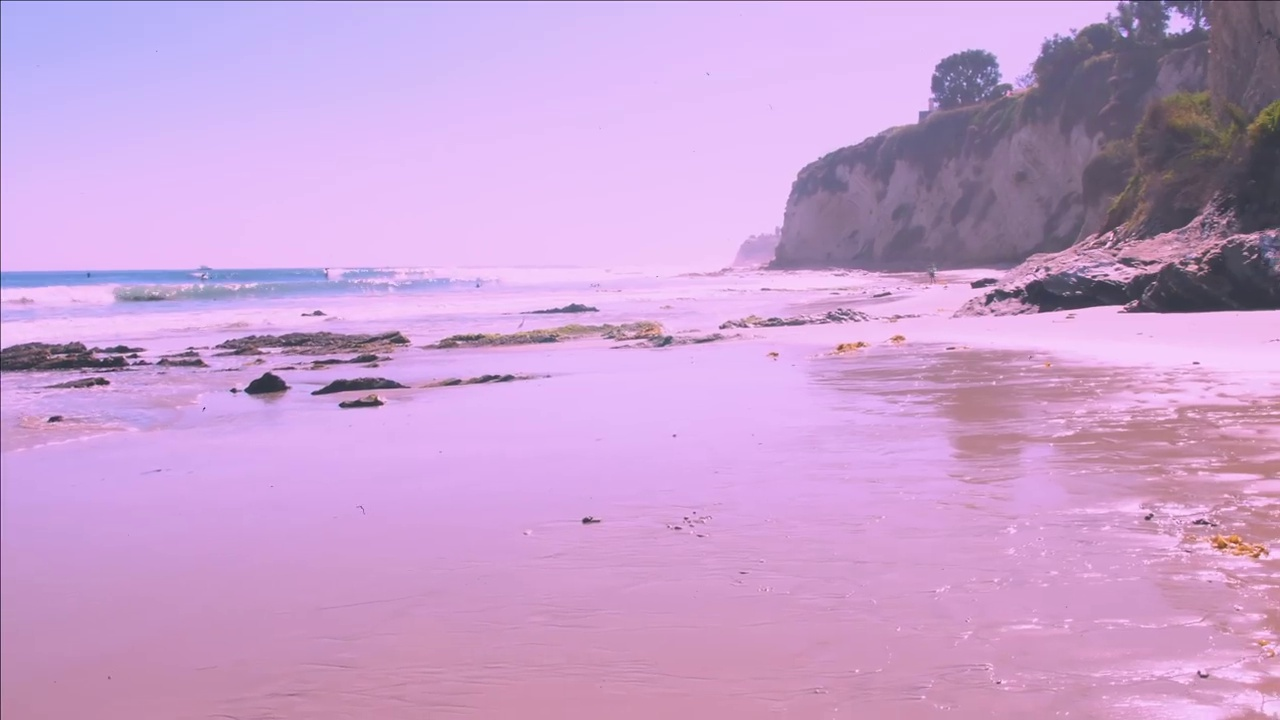

In [18]:
main()